# Ranking Ads (Multi-Armed Bandit)

#### Métodos Analíticos 2018

#### Daniel Camarena - 109417
#### Maximiliano Alvarez - 131005

### Introducción

Un problema muy estudiado dentro de la teoría de probabilidad es aquel en el que se tiene un número fijo de recursos que deben ser asignados a diferentes opciones a elegir con el fin de maximizar una ganancia. Dentro de este problema no se tiene mayor información sobre las propiedades de las diferentes opciones (cuál generará una ganancia mayor, por ejemplo); sin embargo con el paso del tiempo y con la inversión de recursos en las diferentes opciones podemos obtener mayor información acerca de estas.

El problema de bandidos multibrazo modela a un agente que intenta simultáneamente adquirir conicimiento sobre las diferentes opciones disponibles (exploración) y optimizar sus decisiones basadas en el conocimiento adquirido con el fin de poder optimizar sus recompensas (explotación).

### Objetivo

En este proyecto aplicaremos distintas políticas dentro del algoritmo del bandido multibrazo para elegir el mejor anuncio a mostrar dentro de una página web, partiendo de un pool de anuncios, donde únicamente contaremos con la información histórica (número de clicks) de cada uno de los anuncios. 

El objetivo de cada una de las políticas implementadas será mostrar el anuncio que genere el mayor número de clicks cada vez que este sea mostrado.

Compararemos el desempeño de algunas políticas implementadas dentro de los bandidos multibrazo en diferentes situaciones, asumiendo que cada anuncio tiene una probabilidad inherente de ser seleccionado cada vez que este es mostrado (esta probabilidad no es conocida por el agente). Para ello, cambiaremos las condiciones del ambiente, comparando así el desempeño para estas distintas condiciones:

* Mismo pago vs. Pago distinto por cada click
* Pocos anuncios vs. Muchos anuncios
* Anuncios permanentes vs. Anuncios con vigencia
* Probabilidad de elección fija vs. Probabilidad de elección cambiante

### Algoritmos más comunes

Dentro del problema de bandidos hay diferentes estrategias (políticas) que se pueden seguir para resolver el problema de optimización, a continuación se detallan algunas:

#### Estrategias Semi-uniformes

Las estrategias semi-uniformes fueron las primeras y más simples descubiertas para resolver el problema de los bandidos. Todas las estrategias tienen un comportamiento codicioso, donde se explota la mejor opción (basado en el conocimiento adquirido) la mayor parte del tiempo excepto con una probabilidad $\epsilon$, donde se exploran otras opciones.

+ **$\epsilon$-codiciosa**: La mejor opción es explotada una porción $1 - \epsilon$ de los intentos y se exploran nuevas opciones una porción $\epsilon$ de las veces. Un valor típico es $\epsilon = 0.10$;  sin embargo puede variar dependiendo del problema que se intente resolver.

La estrategia $\epsilon$-codiciosa es la más simple y usada estrategia para resolver el problema de los bandidos multibrazo. Esta consiste en elegir una palanca de forma aleatoria con probabilidad $\epsilon$, o con probabilidad $1-\epsilon$ elegir la palanca con la media más alta. Esta media está basada en las recompensas obtenidas hasta el momento de la decisión. Esta $\epsilon$ se encuentra en el intervalo $(0,1)$. Estos métodos que implican una distinción binaria entre la explotación (codicioso) y la exploración (uniforme sobre las posibles palancas) son conocidos como métodos semi uniformes.

+ **$\epsilon$-decreciente**: Similar al **$\epsilon$-codicioso** sin embargo, en este caso la $\epsilon$ decrece conforme el experimento avanza, esto resulta en una fase altamente explorativa al principio del experimento y altamente explotativa hacia el final.

#### Softmax

La estrategia softmax consiste en una elección aleatoria de una distribución Gibbs. La palanca $k$ es elegida con probabilidad $p_k=\frac{e^{\hat{\mu}_k/\tau}}{\sum_{i=1}^n e^{\hat{\mu}_i/\tau}}$ donde $\hat{\mu_i}$ es la media estimada de las recompensas de la palanca $i$ y $\tau \in \mathbb{R}^+$ es un parámetro llamado temperatura.

#### Upper Confidence Bound Algorithm

El algoritmo UCB está basado en el principio del optimismo ante la incertidumbre, lo que implica tomar decisiones como si estuviéramos en las mejores condiciones posibles. Con lo anterior queremos decir que la media que tomamos de cada uno de los brazos es tan grande como la evidencia empírica nos permita asumirla. 

Lo anterior se basa en lo siguiente: ya sea que el optimismo esté justificado, en cuyo caso se está actuando de forma óptima, o puede ser también que el optimismo sea equivocado. En este caso, aunque el tomador de decisiones esperara una recompensa grande, este no la recibirá; después de que esto suceda un número suficiente de ocasiones, el tomador de decisiones conocerá el verdadero pago de esta opcion y terminará por cambiarla. 

#### Muestreo Thompson

El muestreo Thompson, también conocido como muestreo posterior, fue propuesto en 1933 para asignar esfuerzos experimentales en un problema de tragamonedas de dos brazos derivado de pruebas clínicas.
La idea del muestreo de Thompson es seleccionar de forma aleatoria cada brazo de acuerdo a su probabilidad de ser óptimo. 

En cada ronda, tenemos el contexto $x$ (opcional) y un conjunto de acciones $\mathcal{A}$. Después de elegir la acción $a\in \mathcal{A}$, observamos la recompensa $r$. El objetivo es encontrar la política que seleccione acciones de tal forma que la recompensa acumulada sea tan grande como sea posible.

Bajo el contexto bayesiano, el muestreo de Thompson se puede explicar de la siguiente manera: el conjunto de observaciones pasadas $D$ está compuesto por las tercias $(x_i,a_i,r_i)$ y estas son modeladas por una función de verosimilitud paramétrica $P(r|a,x,\theta)$ dependiendes de un parámetro $\theta$. Dada una distribución inicial $P(\theta)$ sobre este parámetro, la distribución posterior está dada por la regla de Bayes, $P(\theta|D)\propto \Pi P(r_i|a_i,x_i,\theta)P(\theta)$. 

En el caso realizado, la recompensa es una función estocástica de la acción, el contexto y el valor verdadero y desconocido del parámetro $\theta^*$. Idealmente, buscamos escoger la acción que maximice la recompensa esperada, $\text{max}_a \mathbb{E}(r|a,x,\theta^*)$.

Bajo el principio de la exploración / explotación, la heurística de probabilidad consiste en elegir de manera aleatoria la acción $a$ de acuerdo a su probabilidad de ser óptima. Esto implica que la acción $a$ es elegida con probabilidad 

$$\int \mathbb{I}[\mathbb{E}(r|a,x,\theta)=\text{max}_{a^+}\mathbb{E}(r|a^+,x,\theta)]P(\theta|D)d\theta$$

donde $\mathbb{I}$ es la función indicadora. 

### Implementación de los algoritmos en Python

#### a. Epsilon codiciosa

A continuación, presentaremos la implementación del algoritmo $\epsilon$-codicioso y su desempeño con diferentes $\epsilon$ **(0.1, 0.2, 0.3, 0.4, 0.5)** en un ambiente simulado de máquinas Bernoulli.

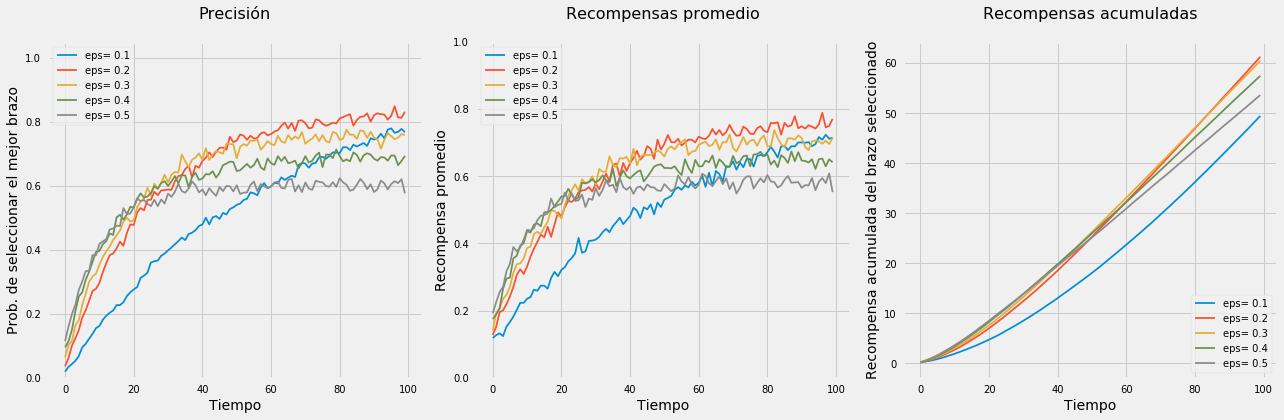

In [1]:
import os
import sys

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

sys.path.append(os.path.abspath("../"))

%matplotlib inline
plt.style.use("fivethirtyeight")
sns.set_context("notebook")

class EpsilonGreedy:
    def __init__(self, epsilon, counts=None, values=None):
        self.epsilon = epsilon
        self.counts = counts
        self.values = values

    def initialize(self, n_arms):
        self.counts = np.zeros(n_arms,dtype=int)
        self.values = np.zeros(n_arms,dtype=float)

    def select_arm(self):
        z = np.random.random()
        if z > self.epsilon:
            return np.argmax(self.values)
        return np.random.randint(0, len(self.values))

    def update(self, chosen_arm, reward):
        self.counts[chosen_arm] += 1
        n = self.counts[chosen_arm]

        value = self.values[chosen_arm]
        new_value = value * ((n-1)/n) + reward/n
        self.values[chosen_arm]=new_value

class BernoulliArm:
    def __init__(self, p):
        self.p = p

    def draw(self):
        z = np.random.random()
        if z > self.p:
            return 0.0
        return 1.0

def test_algorithm(algo, arms, num_simulations, horizon):
    chosen_arms = np.zeros((num_simulations, horizon))
    rewards = np.zeros((num_simulations, horizon))
    for sim in range(num_simulations):
        algo.initialize(len(arms))

        for t in range(horizon):
            chosen_arm = algo.select_arm()
            chosen_arms[sim,t] = chosen_arm

            reward = arms[chosen_arm].draw()
            rewards[sim,t] = reward

            algo.update(chosen_arm, reward)

    average_rewards = np.mean(rewards, axis = 0)
    cumulative_rewards = np.cumsum(average_rewards)

    return chosen_arms, average_rewards, cumulative_rewards

ALGORITHMS = {
    "epsilon-Greedy": EpsilonGreedy
}

def plot_algorithm(alg_name="epsilon-Greedy", arms=None, best_arm_index=None,hyper_params=None, num_simulations=1000, horizon=100, label=None,fig_size=(18, 6)):
    fig, axes = plt.subplots(1, 3, figsize=fig_size)
    for hyper_param in hyper_params:
        algo = ALGORITHMS[alg_name](hyper_param)
        chosen_arms, average_rewards, cum_rewards = test_algorithm(algo, arms, num_simulations, horizon)
        average_probs = np.where(chosen_arms == best_arm_index, 1, 0).sum(axis=0) / num_simulations
        axes[0].plot(average_probs, label=label + "= %s" %hyper_param)
        axes[0].set_xlabel("Tiempo", fontsize=14)
        axes[0].set_ylabel("Prob. de seleccionar el mejor brazo", fontsize=14)
        axes[0].set_title("Precisión", y=1.05, fontsize=16)
        axes[0].legend()
        axes[0].set_ylim([0, 1.05])
        axes[1].plot(average_rewards, label=label + "= %s" %hyper_param)
        axes[1].set_xlabel("Tiempo", fontsize=14)
        axes[1].set_ylabel("Recompensa promedio", fontsize=14)
        axes[1].set_title("Recompensas promedio", y=1.05, fontsize=16)
        axes[1].legend()
        axes[1].set_ylim([0, 1.0])
        axes[2].plot(cum_rewards, label=label + "= %s" %hyper_param)
        axes[2].set_xlabel("Tiempo", fontsize=14)
        axes[2].set_ylabel("Recompensa acumulada del brazo seleccionado", fontsize=14)
        axes[2].set_title("Recompensas acumuladas", y=1.05, fontsize=16)
        axes[2].legend(loc="lower right")
        plt.tight_layout()

np.random.seed(1)
means = [0.1, 0.1, 0.1, 0.1, 0.9]
n_arms = len(means)
np.random.shuffle(means)
arms = list(map(lambda mu: BernoulliArm(mu), means))
best_arm_index = np.argmax(means)
epsilon = [0.1, 0.2, 0.3, 0.4, 0.5]
plot_algorithm(alg_name="epsilon-Greedy", arms=arms, best_arm_index=best_arm_index,
               hyper_params=epsilon, num_simulations=1000, horizon=100, label="eps")


#### b. Epsilon codicioso decreciente

A continuación presentaremos la implementación del algoritmo $\epsilon$ codicioso decreciente y su desempeño con diferentes $\epsilon$ **(0.1,0.2,0.3,0.4,0.5)** en un ambiente simulado de máquinas Bernoulli.

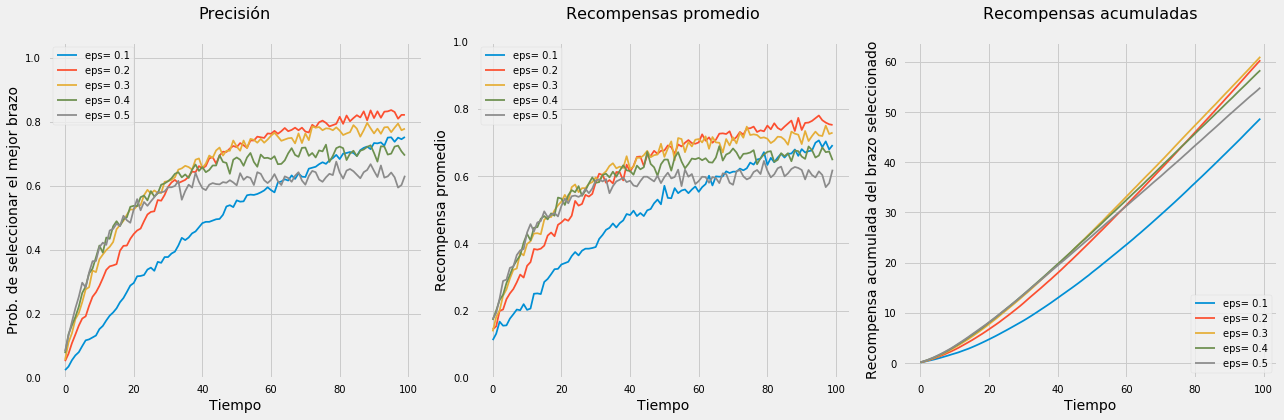

In [2]:
import os
import sys

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

sys.path.append(os.path.abspath("../"))

%matplotlib inline
plt.style.use("fivethirtyeight")
sns.set_context("notebook")

class EpsilonGreedyDec:
    def __init__(self, epsilon, counts=None, values=None):
        self.epsilon = epsilon
        self.counts = counts
        self.values = values

    def initialize(self, n_arms):
        self.counts = np.zeros(n_arms,dtype=int)
        self.values = np.zeros(n_arms,dtype=float)

    def select_arm(self, i):        
        z = np.random.random()
        if z > self.epsilon*(0.999**i):
            return np.argmax(self.values)
        return np.random.randint(0, len(self.values))

    def update(self, chosen_arm, reward):
        self.counts[chosen_arm] += 1
        n = self.counts[chosen_arm]

        value = self.values[chosen_arm]
        new_value = value * ((n-1)/n) + reward/n
        self.values[chosen_arm]=new_value

class BernoulliArm:
    def __init__(self, p):
        self.p = p

    def draw(self):
        z = np.random.random()
        if z > self.p:
            return 0.0
        return 1.0

def test_algorithm(algo, arms, num_simulations, horizon):
    chosen_arms = np.zeros((num_simulations, horizon))
    rewards = np.zeros((num_simulations, horizon))
    for sim in range(num_simulations):
        algo.initialize(len(arms))

        for t in range(horizon):
            chosen_arm = algo.select_arm(t)
            chosen_arms[sim,t] = chosen_arm

            reward = arms[chosen_arm].draw()
            rewards[sim,t] = reward

            algo.update(chosen_arm, reward)

    average_rewards = np.mean(rewards, axis = 0)
    cumulative_rewards = np.cumsum(average_rewards)

    return chosen_arms, average_rewards, cumulative_rewards

ALGORITHMS = {
    "epsilon-Greedy-dec": EpsilonGreedyDec
}

def plot_algorithm(alg_name="epsilon-Greedy", arms=None, best_arm_index=None,hyper_params=None, num_simulations=1000, horizon=100, label=None,fig_size=(18, 6)):
    fig, axes = plt.subplots(1, 3, figsize=fig_size)
    for hyper_param in hyper_params:
        algo = ALGORITHMS[alg_name](hyper_param)
        chosen_arms, average_rewards, cum_rewards = test_algorithm(algo, arms, num_simulations, horizon)
        average_probs = np.where(chosen_arms == best_arm_index, 1, 0).sum(axis=0) / num_simulations
        axes[0].plot(average_probs, label=label + "= %s" %hyper_param)
        axes[0].set_xlabel("Tiempo", fontsize=14)
        axes[0].set_ylabel("Prob. de seleccionar el mejor brazo", fontsize=14)
        axes[0].set_title("Precisión", y=1.05, fontsize=16)
        axes[0].legend()
        axes[0].set_ylim([0, 1.05])
        axes[1].plot(average_rewards, label=label + "= %s" %hyper_param)
        axes[1].set_xlabel("Tiempo", fontsize=14)
        axes[1].set_ylabel("Recompensa promedio", fontsize=14)
        axes[1].set_title("Recompensas promedio", y=1.05, fontsize=16)
        axes[1].legend()
        axes[1].set_ylim([0, 1.0])
        axes[2].plot(cum_rewards, label=label + "= %s" %hyper_param)
        axes[2].set_xlabel("Tiempo", fontsize=14)
        axes[2].set_ylabel("Recompensa acumulada del brazo seleccionado", fontsize=14)
        axes[2].set_title("Recompensas acumuladas", y=1.05, fontsize=16)
        axes[2].legend(loc="lower right")
        plt.tight_layout()

np.random.seed(1)
means = [0.1, 0.1, 0.1, 0.1, 0.9]
n_arms = len(means)
np.random.shuffle(means)
arms = list(map(lambda mu: BernoulliArm(mu), means))
best_arm_index = np.argmax(means)
epsilon = [0.1, 0.2, 0.3, 0.4, 0.5]
plot_algorithm(alg_name="epsilon-Greedy-dec", arms=arms, best_arm_index=best_arm_index,
               hyper_params=epsilon, num_simulations=1000, horizon=100, label="eps")


#### c. Upper Confidence Bound Algorithm

A continuación se presenta la implementación del algoritmo UCB y su desempeño en un ambiente simulado de máquinas Bernoulli.

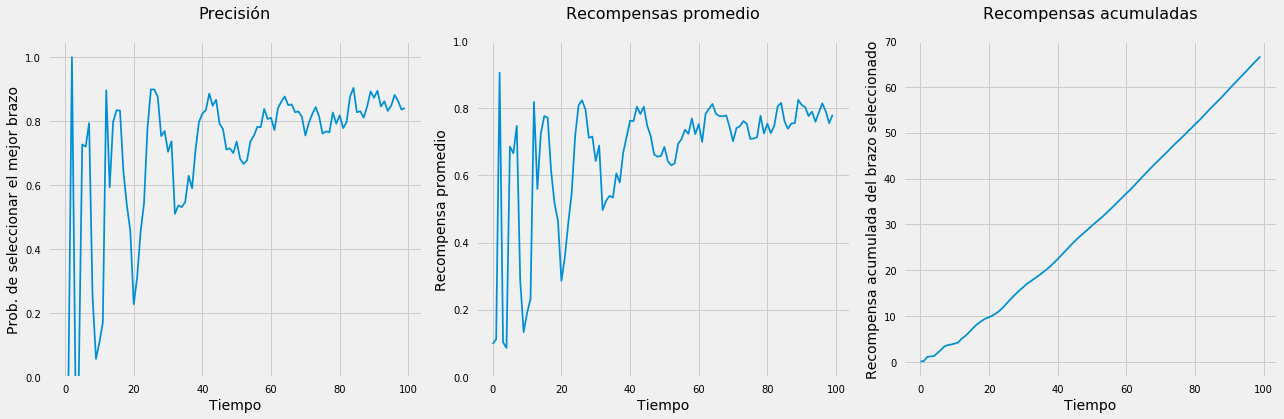

In [4]:
import os
import sys

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


sys.path.append(os.path.abspath("../"))

%matplotlib inline
plt.style.use("fivethirtyeight")
sns.set_context("notebook")


class UCB:
    def __init__(self, counts=None, values=None):
        self.counts = counts
        self.values = values

    def initialize(self, n_arms):
        self.counts = np.zeros(n_arms, dtype=int)
        self.values = np.zeros(n_arms, dtype=float)

    def select_arm(self):
        n_arms = len(self.counts)

        for arm in range(n_arms):
            if self.counts[arm] == 0:
                return arm

        ucb_values = np.zeros(n_arms)
        n = np.sum(self.counts)
        for arm in range(n_arms):
            bonus = np.sqrt((2 * np.log(n)) / self.counts[arm])
            ucb_values[arm] = self.values[arm] + bonus

        return np.argmax(ucb_values)

    def update(self, chosen_arm, reward):
        self.counts[chosen_arm] += 1
        n = self.counts[chosen_arm]

        value = self.values[chosen_arm]
        new_value = value * ((n - 1) / n) + reward / n
        self.values[chosen_arm] = new_value

class BernoulliArm:
    def __init__(self, p):
        self.p = p

    def draw(self):
        z = np.random.random()
        if z > self.p:
            return 0.0
        return 1.0

def test_algorithm(algo, arms, num_simulations, horizon):
    chosen_arms = np.zeros((num_simulations, horizon))
    rewards = np.zeros((num_simulations, horizon))
    for sim in range(num_simulations):
        algo.initialize(len(arms))

        for t in range(horizon):
            chosen_arm = algo.select_arm()
            chosen_arms[sim,t] = chosen_arm

            reward = arms[chosen_arm].draw()
            rewards[sim,t] = reward

            algo.update(chosen_arm, reward)

    average_rewards = np.mean(rewards, axis = 0)
    cumulative_rewards = np.cumsum(average_rewards)

    return chosen_arms, average_rewards, cumulative_rewards

ALGORITHMS = {
    "UCB": UCB,
}

def plot_algorithm(alg_name="epsilon-Greedy", arms=None, best_arm_index=None,hyper_params=None, num_simulations=1000, horizon=100, label=None,fig_size=(18, 6)):
    algo = ALGORITHMS[alg_name]()
    chosen_arms, average_rewards, cum_rewards = test_algorithm(algo, arms, num_simulations, horizon)
    average_probs = np.where(chosen_arms == best_arm_index, 1, 0).sum(axis=0) / num_simulations

    fig, axes = plt.subplots(1, 3, figsize=fig_size)
    axes[0].plot(average_probs)
    axes[0].set_xlabel("Tiempo", fontsize=14)
    axes[0].set_ylabel("Prob. de seleccionar el mejor brazo", fontsize=14)
    axes[0].set_title("Precisión", y=1.05, fontsize=16)
    axes[0].set_ylim([0, 1.05])
    axes[1].plot(average_rewards)
    axes[1].set_xlabel("Tiempo", fontsize=14)
    axes[1].set_ylabel("Recompensa promedio", fontsize=14)
    axes[1].set_title("Recompensas promedio", y=1.05, fontsize=16)
    axes[1].set_ylim([0, 1.0])
    axes[2].plot(cum_rewards)
    axes[2].set_xlabel("Tiempo", fontsize=14)
    axes[2].set_ylabel("Recompensa acumulada del brazo seleccionado", fontsize=14)
    axes[2].set_title("Recompensas acumuladas", y=1.05, fontsize=16)
    plt.tight_layout()

np.random.seed(1)
means = [0.1, 0.1, 0.1, 0.1, 0.9]
n_arms = len(means)
np.random.shuffle(means)
arms = list(map(lambda mu: BernoulliArm(mu), means))
best_arm_index = np.argmax(means)
plot_algorithm(alg_name="UCB", arms=arms, best_arm_index=best_arm_index, num_simulations=1000, horizon=100)


#### d. Sampleo Thompson

A continuación se presenta la implementación del algoritmo de sampleo de Thompson y su desempeño en un ambiente simulado de máquinas Bernoulli.

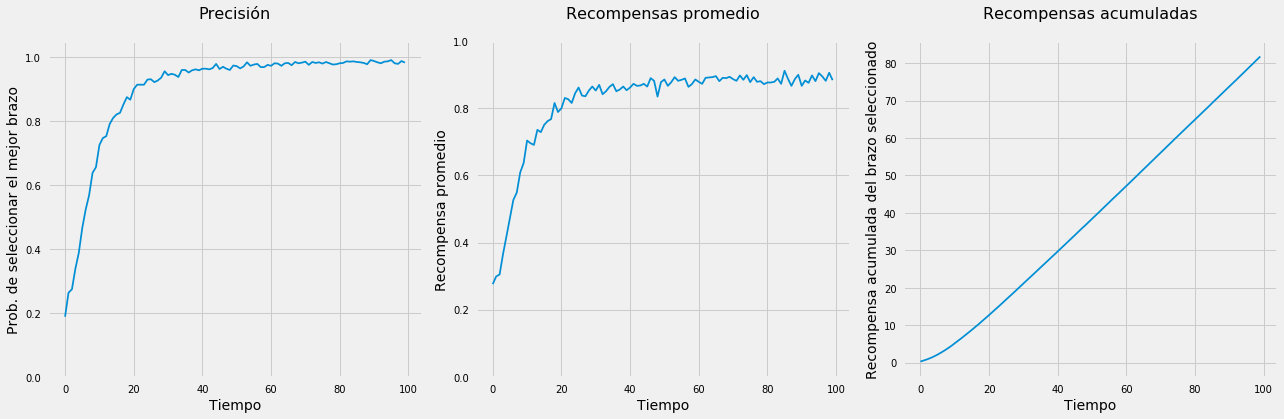

In [5]:
import os
import sys

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


sys.path.append(os.path.abspath("../"))

%matplotlib inline
plt.style.use("fivethirtyeight")
sns.set_context("notebook")


class Thompson:
    def __init__(self, wins=None, looses=None):
        self.wins = wins
        self.looses = looses

    def initialize(self, n_arms):
        self.wins = np.zeros(n_arms, dtype=int)
        self.looses = np.zeros(n_arms, dtype=float)

    def select_arm(self):
        return np.argmax(np.random.beta(self.wins+1,self.looses+1))

    def update(self, chosen_arm, reward):
        if(reward):
            self.wins[chosen_arm] += 1
        else:
            self.looses[chosen_arm] +=1

class BernoulliArm:
    def __init__(self, p):
        self.p=p
        
    def draw(self):
        return np.random.binomial(1, self.p) == 1

def test_algorithm(algo, arms, num_simulations, horizon):
    chosen_arms = np.zeros((num_simulations, horizon))
    rewards = np.zeros((num_simulations, horizon))
    for sim in range(num_simulations):
        algo.initialize(len(arms))

        for t in range(horizon):
            chosen_arm = algo.select_arm()
            chosen_arms[sim,t] = chosen_arm

            reward = arms[chosen_arm].draw()
            rewards[sim,t] = reward

            algo.update(chosen_arm, reward)

    average_rewards = np.mean(rewards, axis = 0)
    cumulative_rewards = np.cumsum(average_rewards)

    return chosen_arms, average_rewards, cumulative_rewards

ALGORITHMS = {
    "thompson": Thompson,
}

def plot_algorithm(alg_name="epsilon-Greedy", arms=None, best_arm_index=None,hyper_params=None, num_simulations=1000, horizon=100, label=None,fig_size=(18, 6)):
    algo = ALGORITHMS[alg_name]()
    chosen_arms, average_rewards, cum_rewards = test_algorithm(algo, arms, num_simulations, horizon)
    average_probs = np.where(chosen_arms == best_arm_index, 1, 0).sum(axis=0) / num_simulations

    fig, axes = plt.subplots(1, 3, figsize=fig_size)
    axes[0].plot(average_probs)
    axes[0].set_xlabel("Tiempo", fontsize=14)
    axes[0].set_ylabel("Prob. de seleccionar el mejor brazo", fontsize=14)
    axes[0].set_title("Precisión", y=1.05, fontsize=16)
    axes[0].set_ylim([0, 1.05])
    axes[1].plot(average_rewards)
    axes[1].set_xlabel("Tiempo", fontsize=14)
    axes[1].set_ylabel("Recompensa promedio", fontsize=14)
    axes[1].set_title("Recompensas promedio", y=1.05, fontsize=16)
    axes[1].set_ylim([0, 1.0])
    axes[2].plot(cum_rewards)
    axes[2].set_xlabel("Tiempo", fontsize=14)
    axes[2].set_ylabel("Recompensa acumulada del brazo seleccionado", fontsize=14)
    axes[2].set_title("Recompensas acumuladas", y=1.05, fontsize=16)
    plt.tight_layout()

np.random.seed(1)
means = [0.1, 0.1, 0.1, 0.1, 0.9]
n_arms = len(means)
np.random.shuffle(means)
arms = list(map(lambda mu: BernoulliArm(mu), means))
best_arm_index = np.argmax(means)
plot_algorithm(alg_name="thompson", arms=arms, best_arm_index=best_arm_index, num_simulations=1000, horizon=100)



#### c. Softmax

A continuación presentaremos la implementación del algoritmo softmax y su desempeño con diferentes temperaturas **(0.1, 0.2, 0.3, 0.4, 0.5)** en un ambiente simulado de máquinas Bernoulli.

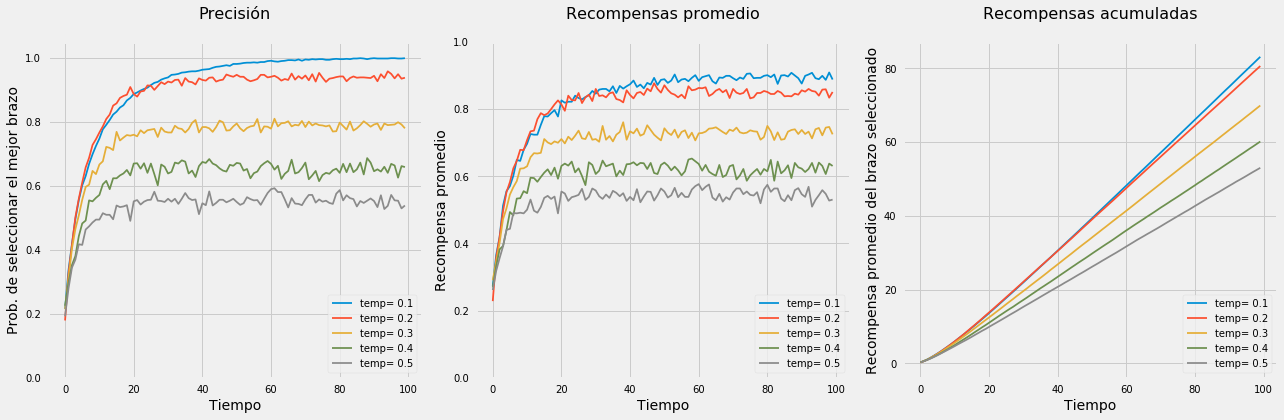

In [6]:
import os
import sys

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

sys.path.append(os.path.abspath("../"))

%matplotlib inline
plt.style.use("fivethirtyeight")
sns.set_context("notebook")


class Softmax:
    def __init__(self, temperature, counts=None, values=None):
        self.temperature = temperature
        self.counts = counts
        self.values = values

    def initialize(self, n_arms):
        self.counts = np.zeros(n_arms, dtype=int)
        self.values = np.zeros(n_arms, dtype=float)

    def select_arm(self):
        z = self.values / self.temperature
        probs = np.exp(z) / np.sum(np.exp(z))
        return Softmax.categorical_draw(probs)

    @staticmethod
    def categorical_draw(probs):
        preds = np.random.multinomial(1, probs, 1)
        return np.argmax(preds)

    def update(self, chosen_arm, reward):
        # Increment counts
        self.counts[chosen_arm] += 1
        n = self.counts[chosen_arm]

        # Update the expected values of chosen arm
        value = self.values[chosen_arm]
        new_value = value * ((n - 1) / n) + reward / n
        self.values[chosen_arm] = new_value

class BernoulliArm:
    def __init__(self, p):
        self.p = p

    def draw(self):
        z = np.random.random()
        if z > self.p:
            return 0.0
        return 1.0

def test_algorithm(algo, arms, num_simulations, horizon):
    chosen_arms = np.zeros((num_simulations, horizon))
    rewards = np.zeros((num_simulations, horizon))
    for sim in range(num_simulations):
        algo.initialize(len(arms))

        for t in range(horizon):
            chosen_arm = algo.select_arm()
            chosen_arms[sim,t] = chosen_arm

            reward = arms[chosen_arm].draw()
            rewards[sim,t] = reward

            algo.update(chosen_arm, reward)

    average_rewards = np.mean(rewards, axis = 0)
    cumulative_rewards = np.cumsum(average_rewards)

    return chosen_arms, average_rewards, cumulative_rewards

ALGORITHMS = {
    "Softmax": Softmax,
}

def plot_algorithm(alg_name="epsilon-Greedy", arms=None, best_arm_index=None,hyper_params=None, num_simulations=1000, horizon=100, label=None,fig_size=(18, 6)):
    fig, axes = plt.subplots(1, 3, figsize=fig_size)
    for hyper_param in hyper_params:
        algo = ALGORITHMS[alg_name](hyper_param)
        chosen_arms, average_rewards, cum_rewards = test_algorithm(algo, arms, num_simulations, horizon)
        average_probs = np.where(chosen_arms == best_arm_index, 1, 0).sum(axis=0) / num_simulations
        axes[0].plot(average_probs, label=label + "= %s" %hyper_param)
        axes[0].set_xlabel("Tiempo", fontsize=14)
        axes[0].set_ylabel("Prob. de seleccionar el mejor brazo", fontsize=14)
        axes[0].set_title("Precisión", y=1.05, fontsize=16)
        axes[0].legend()
        axes[0].set_ylim([0, 1.05])
        axes[1].plot(average_rewards, label=label + "= %s" %hyper_param)
        axes[1].set_xlabel("Tiempo", fontsize=14)
        axes[1].set_ylabel("Recompensa promedio", fontsize=14)
        axes[1].set_title("Recompensas promedio", y=1.05, fontsize=16)
        axes[1].legend()
        axes[1].set_ylim([0, 1.0])
        axes[2].plot(cum_rewards, label=label + "= %s" %hyper_param)
        axes[2].set_xlabel("Tiempo", fontsize=14)
        axes[2].set_ylabel("Recompensa promedio del brazo seleccionado", fontsize=14)
        axes[2].set_title("Recompensas acumuladas", y=1.05, fontsize=16)
        axes[2].legend(loc="lower right")
        plt.tight_layout()

np.random.seed(1)
means = [0.1, 0.1, 0.1, 0.1, 0.9]
n_arms = len(means)
np.random.shuffle(means)
arms = list(map(lambda mu: BernoulliArm(mu), means))
best_arm_index = np.argmax(means)
temperature = [0.1, 0.2, 0.3, 0.4, 0.5]
plot_algorithm(alg_name="Softmax", arms=arms, best_arm_index=best_arm_index,
               hyper_params=temperature, num_simulations=1000, horizon=100, label="temp")


###  Configuración clásica

Con el fin de comparar diferentes politicas, empezaremos con la formulación más común de este problema, descrita a continuación: 

+ En cada paso un anuncio tiene que ser elegido para ser mostrado dentro de un pool de anuncios.
+ Cada anuncio tiene una probabilidad de ser clickeado cuando es mostrado, esta probabilidad es constante en el tiempo.
+ Cada vez que un anuncio es mostrado, se conoce si fue clickeado o no.
+ No hay diferencia entre los clicks otorgados por el usuario, i.e. la recompensa es igual siempre.

El ambiente de simulación se configurará como sigue:

+ Probabilidad de cada anuncio para recibir un click ($P(click_{ad})\sim Beta(2,17)$).
+ 100,000 iteraciones en el tiempo.
+ Cuando aplique, la probabilidad inicial de recibir un click será del 50 por ciento.

/Users/ocamarena/.pyenv/versions/3.5.2/lib/python3.5/site-packages/ipykernel_launcher.py:50: RuntimeWarning: overflow encountered in exp
/Users/ocamarena/.pyenv/versions/3.5.2/lib/python3.5/site-packages/ipykernel_launcher.py:50: RuntimeWarning: invalid value encountered in true_divide
/Users/ocamarena/.pyenv/versions/3.5.2/lib/python3.5/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


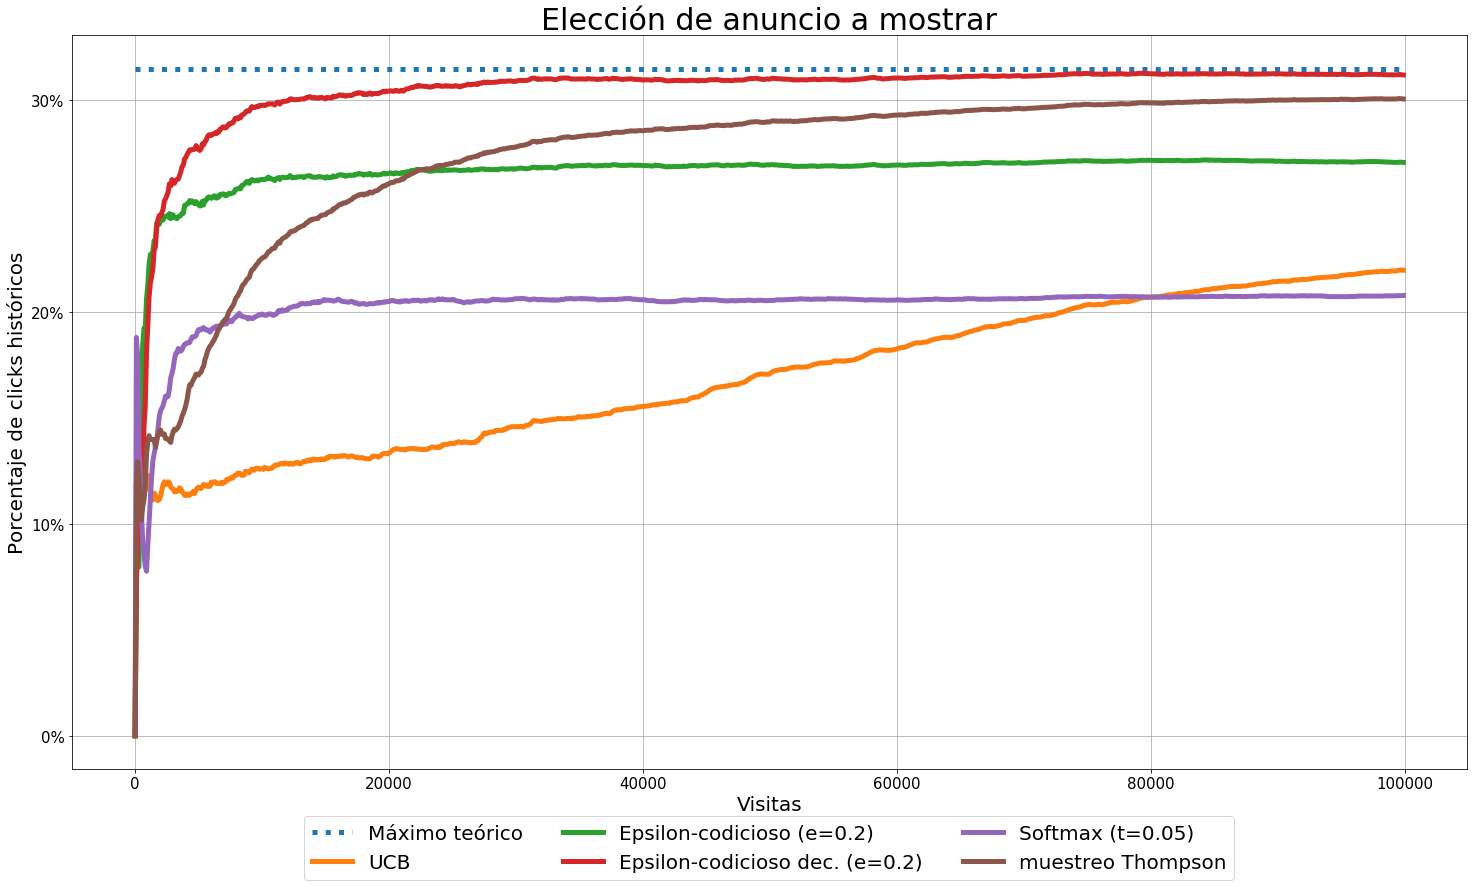

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from pylab import rcParams
#import warnings; warnings.simplefilter('ignore')

%matplotlib inline

# Creamos 100 anuncios
n_ads=100
np.random.seed(159)
ads_clickprob=np.random.beta(2,17,size=n_ads)
max_ctr=np.max(ads_clickprob)

# Contadores para cada algoritmo
clicks_eg1=np.array([1]*n_ads)
trials_eg1=np.array([2]*n_ads)
ctr_eg1 = list()

clicks_eg_dec=np.array([1]*n_ads)
trials_eg_dec=np.array([2]*n_ads)
ctr_eg_dec=list()

clicks_softmax=np.array([1]*n_ads)
trials_softmax=np.array([2]*n_ads)
ctr_softmax = list()

clicks_ucb1=np.array([1]*n_ads)
trials_ucb1=np.array([2]*n_ads)
ctr_ucb1=list()

clicks_thomp=np.array([0]*n_ads)
trials_thomp=np.array([0]*n_ads)
ctr_thomp=list()

# Iniciamos simulacion
for i in range(100000):
    if np.random.random()<=0.2: #Estamos considerando una epsilon de 0.2
        ad_eg1=np.random.randint(low=0,high=n_ads)
    else:
        ad_eg1=np.argmax(clicks_eg1/trials_eg1)
    trials_eg1[ad_eg1]+=1
    
    if np.random.random()<=.2*(.999**i):
        ad_eg_dec=np.random.randint(low=0,high=n_ads)
    else:
        ad_eg_dec=np.argmax(clicks_eg_dec/trials_eg_dec)
    trials_eg_dec[ad_eg_dec]+=1
    
    z = clicks_softmax / 0.05 #Estamos considerando una temperatura de 0.05
    probs = np.exp(z) / np.sum(np.exp(z))
    
    ad_softmax=np.argmax(np.random.multinomial(1, probs, 1))
    trials_softmax[ad_softmax]+=1
    
    ad_ucb1=np.argmax(clicks_ucb1/trials_ucb1 + np.sqrt(2*np.log(i+3))/np.sqrt(trials_ucb1))
    trials_ucb1[ad_ucb1]+=1
    
    ad_thompson=np.argmax([np.random.beta(clicks_thomp[a]+1,trials_thomp[a]-clicks_thomp[a]+1) for a in range(n_ads)])
    trials_thomp[ad_thompson]+=1
    
    # Determinando los anuncios con clicks
    would_have_clicked=[np.random.binomial(1,ads_clickprob[a]) for a in range(n_ads)]
    
    clicks_eg1[ad_eg1]+=would_have_clicked[ad_eg1]
    clicks_eg_dec[ad_eg_dec]+=would_have_clicked[ad_eg_dec]
    clicks_softmax[ad_softmax]+=would_have_clicked[ad_softmax]
    clicks_ucb1[ad_ucb1]+=would_have_clicked[ad_ucb1]
    clicks_thomp[ad_thompson]+=would_have_clicked[ad_thompson]
    
    # Revisando el CTR de cada algoritmos cada 100 iteraciones
    if (i%100)==0:
        ctr_eg1.append((np.sum(clicks_eg1)-1*n_ads)/(np.sum(trials_eg1)-2*n_ads))
        ctr_eg_dec.append((np.sum(clicks_eg_dec)-1*n_ads)/(np.sum(trials_eg_dec)-2*n_ads))
        ctr_softmax.append((np.sum(clicks_softmax)-1*n_ads)/(np.sum(trials_softmax)-2*n_ads))
        ctr_ucb1.append((np.sum(clicks_ucb1)-1*n_ads)/(np.sum(trials_ucb1)-2*n_ads))
        ctr_thomp.append(np.sum(clicks_thomp)/np.sum(trials_thomp))
        

# Visualizando resultados
rcParams['figure.figsize'] = 25, 15
lwd=5
plt.plot([np.max(ads_clickprob)]*int((i+1)/100),linestyle=':',label='Máximo teórico',linewidth=lwd)
plt.plot(ctr_ucb1,label='UCB',linewidth=lwd)
plt.plot(ctr_eg1,label='Epsilon-codicioso (e=0.2)',linewidth=lwd)
plt.plot(ctr_eg_dec,label='Epsilon-codicioso dec. (e=0.2)',linewidth=lwd)
plt.plot(ctr_softmax,label='Softmax (t=0.05)',linewidth=lwd)
plt.plot(ctr_thomp,label='muestreo Thompson',linewidth=lwd)
plt.grid()

ax = plt.subplot(111)
box = ax.get_position()
ax.set_position([box.x0, box.y0 + box.height * 0.1,
                 box.width, box.height * 0.9])
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),
          fancybox=True, ncol=3, prop={'size':20})
plt.tick_params(axis='both', which='major', labelsize=15)
ax.xaxis.set_ticklabels([0]+[100*i for i in range(0,1000+200,200)])
ax.yaxis.set_ticks([i/10 for i in range(0,int(10*np.round(np.max(ads_clickprob),1))+1)])
ax.yaxis.set_ticklabels([str(i*10)+'%' for i in range(0,int(10*np.round(np.max(ads_clickprob),1))+1)])

plt.xlabel('Visitas',size=20)
plt.ylabel('Porcentaje de clicks históricos',size=20)
plt.title('Elección de anuncio a mostrar',size=30)
plt.show()

#### Conclusiones sobre el ejercicio

Las gráficas realizadas durante los ejercicios anteriores nos muestran aspectos relevantes de las distintas implementaciones.

Por ejemplo, para los algoritmos $\epsilon$-codiciosos, juega un papel relevante la elección del parámetro $\epsilon$, ya que esta determina nuestra política ante las posible elecciones que nos enfrentamos. Si, por ejemplo, tomáramos $\epsilon=1$, entonces exploraríamos cada una de las opciones con probabilidad $\frac{1}{n}$. Esto nos permitiría explorar todas las opciones disponibles, asumiendo el costo que implica explorar opciones con una recompensa menor. Si elegimos $\epsilon=0$, explotaríamos siempre la mejor opción y nunca exploraríamos alguna otra alternativa. Esta alternativa dejaría fuera posibles opciones mejores, dado que no exploramos lo suficiente.

La exploración debe de ser alta al inicio con la finalidad de conocer todas las opciones posibles. En algún punto del tiempo, una vez que se tenga el conocimiento suficiente acerca de todas las opciones, se debe de enfocar en explotar la mejor opción disponible. 

Al final, independiente de la elección de la $\epsilon$, todos las estrategias alcanzan la mejor opción. Sin embargo, difieren en el grado de aleatoriedad de cada estrategia al momento de explorar nuevas opciones. En cualquier caso, es necesaria información suficiente, por lo que es necesario ejecutar el experimento por un periodo de tiempo considerable.

En el caso de la estrategia Softmax, la temperatura también juega un papel relevante. Para temperaturas altas, las acciones tienen probabilidades similares, y para temperaturas menores, se asignan mayores probabilidades a aquellas acciones que tengan los valores esperados más altos.

El muestreo de Thompson, además de implicar una implementación relativamente sencilla, es una heurística efectiva para el ejercicio de exploración / explotación. A pesar de que no tiene un parámetro para modificar, es posible ajustar la distribución posterior para reducir el tiempo de exploración. 

Sin embargo, como lo muestra la última gráfica, el algoritmo $\epsilon$-codicioso decreciente, a pesar de ser una de los algoritmos más sencillos, es el más efectivo. El muestreo de Thompson se encuentra muy cerca de este, pero requiere un mayor número de visitas para acercarse al $\epsilon$-codicioso decreciente. 

Este ejercicio demuestra que muchas veces el algoritmo más sofisticado no necesariamente es el más efectivo.

### Diferentes precios y múltiples anuncios mostrados

Los mismos algoritmos mostrados anteriormente puedes ser de utilidad en el caso en el que tenemos diferentes precios por anuncio (diferente recompensa) y múltiples anuncios mostrados cada vez (mostrar 5 anuncios en lugar de 1), seleccionando el anuncio con el mayor limite superior esperado de recompensa, es decir, $\text{argmax } Revenue_i \text{ } UCB(\hat{P_i})$

Solamente en el caso del $\epsilon$-codicioso se pierde un poco de desempeño con respecto a UCB debido a que el primero selecciona aleatoriamente anuncios sin importar la recompensa obtenida.

El escenario de simulación es el mismo que el anterior con los siguientes cambios:

+ Se muestran 5 anuncios en cada oportunidad y la probabilidad de click en cada uno de ellos es independiente.
+ Cada anuncio tiene un precio por click diferente, simulado a partir de una distribución Gamma.

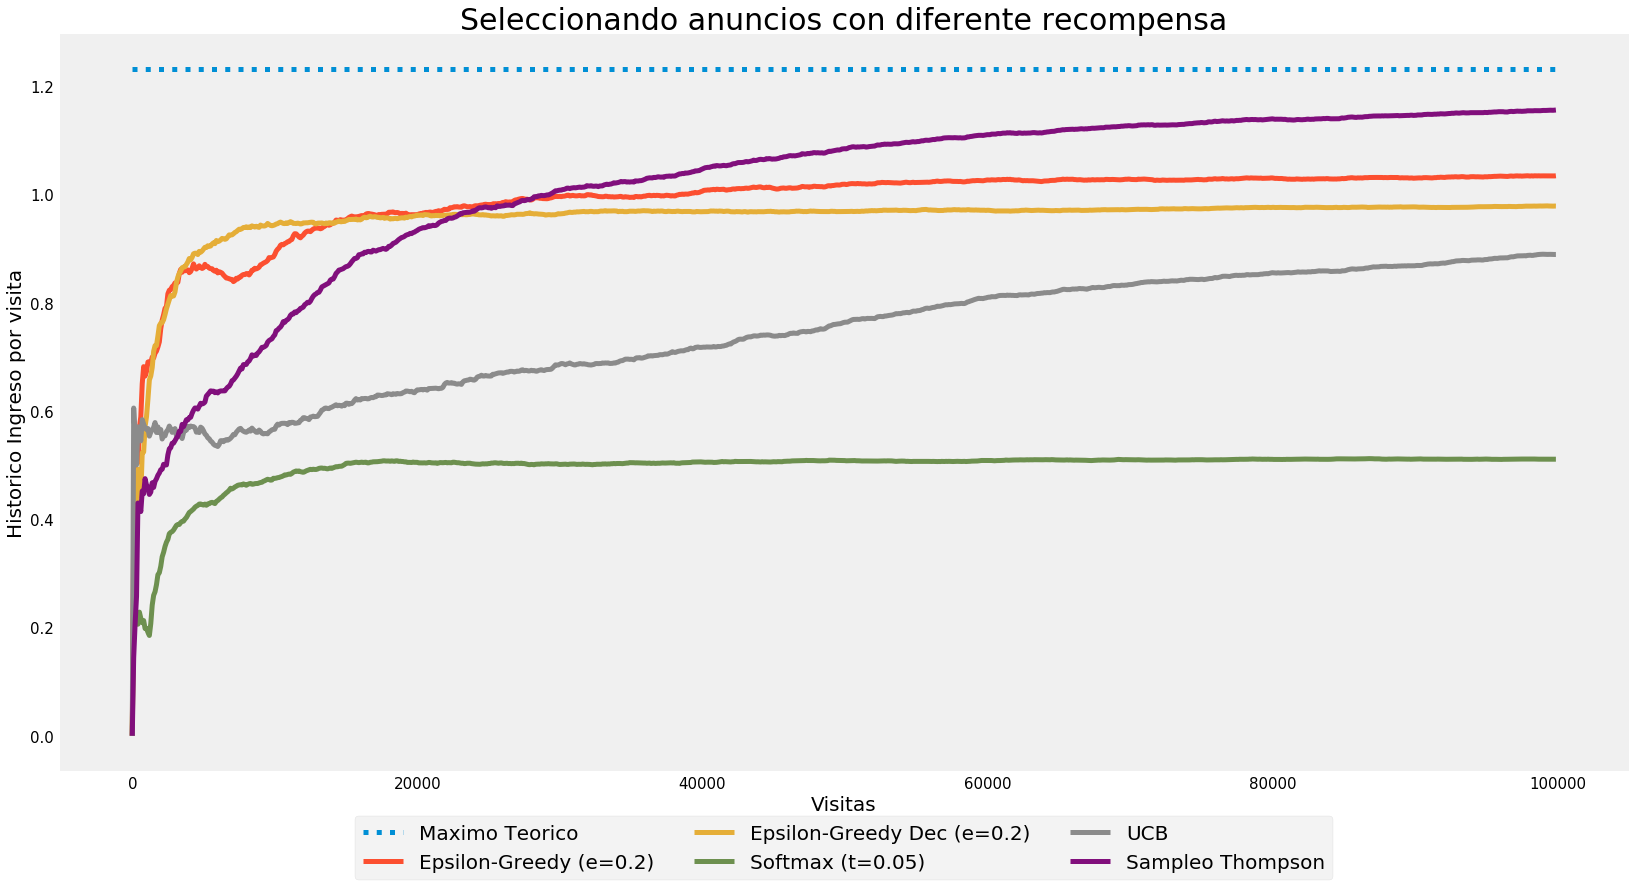

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from pylab import rcParams
import warnings; warnings.simplefilter('ignore')

%matplotlib inline
# mismo escenario que el anterior
# tenemos precio por cada click
n_ads=100
np.random.seed(159)
ads_clickprob=np.random.beta(2,17,size=n_ads)
ads_payment=np.random.gamma(20,.2,size=n_ads)
max_value=np.max(ads_clickprob*ads_payment)

clicks_eg1=np.array([1]*n_ads)
trials_eg1=np.array([2]*n_ads)
avg_rev_eg1=list()

clicks_eg_dec=np.array([1]*n_ads)
trials_eg_dec=np.array([2]*n_ads)
avg_rev_eg_dec=list()

clicks_softmax=np.array([1]*n_ads)
trials_softmax=np.array([2]*n_ads)
avg_rev_softmax = list()

clicks_ucb1=np.array([1]*n_ads)
trials_ucb1=np.array([2]*n_ads)
avg_rev_ucb1=list()

clicks_thomp=np.array([0]*n_ads)
trials_thomp=np.array([0]*n_ads)
avg_rev_thomp=list()

rev_eg1=0
rev_eg_dec=0
rev_softmax=0
rev_ucb1=0
rev_thomp=0

for i in range(100000):
    if np.random.random()<=.2:
        ad_eg1=np.random.randint(low=0,high=n_ads)
    else:
        ad_eg1=np.argmax(ads_payment*clicks_eg1/trials_eg1)
    trials_eg1[ad_eg1]+=1
    
    if np.random.random()<=.2*(.999**i):
        ad_eg_dec=np.random.randint(low=0,high=n_ads)
    else:
        ad_eg_dec=np.argmax(clicks_eg_dec/trials_eg_dec)
    trials_eg_dec[ad_eg_dec]+=1
    
    z = clicks_softmax / 0.05 #Estamos considerando una temperatura de 0.05
    probs = np.exp(z) / np.sum(np.exp(z))
    
    ad_softmax=np.argmax(np.random.multinomial(1, probs, 1))
    trials_softmax[ad_softmax]+=1
    
    ad_ucb1=np.argmax(ads_payment*(clicks_ucb1/trials_ucb1 + np.sqrt(2*np.log(i+3))/np.sqrt(trials_ucb1)))
    trials_ucb1[ad_ucb1]+=1
    
    ad_thompson=np.argmax(ads_payment*np.array([np.random.beta(clicks_thomp[a]+1,trials_thomp[a]-clicks_thomp[a]+1) for a in range(n_ads)]))
    trials_thomp[ad_thompson]+=1
    
    # determining clicks
    would_have_clicked=[np.random.binomial(1,ads_clickprob[a]) for a in range(n_ads)]
    
    clicks_eg1[ad_eg1]+=would_have_clicked[ad_eg1]
    clicks_eg_dec[ad_eg_dec]+=would_have_clicked[ad_eg_dec]
    clicks_softmax[ad_softmax]+=would_have_clicked[ad_softmax]
    clicks_ucb1[ad_ucb1]+=would_have_clicked[ad_ucb1]
    clicks_thomp[ad_thompson]+=would_have_clicked[ad_thompson]
    
    rev_eg1+=would_have_clicked[ad_eg1]*ads_payment[ad_eg1]
    rev_eg_dec+=would_have_clicked[ad_eg_dec]*ads_payment[ad_eg_dec]
    rev_softmax+=would_have_clicked[ad_softmax]*ads_payment[ad_softmax]
    rev_ucb1+=would_have_clicked[ad_ucb1]*ads_payment[ad_ucb1]
    rev_thomp+=would_have_clicked[ad_thompson]*ads_payment[ad_thompson]
    
    if (i%100)==0:
        avg_rev_eg1.append(rev_eg1/(i+1))
        avg_rev_eg_dec.append(rev_eg_dec/(i+1))
        avg_rev_softmax.append(rev_softmax/(i+1))
        avg_rev_ucb1.append(rev_ucb1/(i+1))
        avg_rev_thomp.append(rev_thomp/(i+1))
        
rcParams['figure.figsize'] = 25, 15
lwd=5
plt.plot([max_value]*int((i+1)/100),linestyle=':',label='Máximo teórico',linewidth=lwd)
plt.plot(avg_rev_eg1,label='Epsilon-codicioso (e=0.2)',linewidth=lwd)
plt.plot(avg_rev_eg_dec,label='Epsilon-codicioso dec. (e=0.2)',linewidth=lwd)
plt.plot(avg_rev_softmax,label='Softmax (t=0.05)',linewidth=lwd)
plt.plot(avg_rev_ucb1,label='UCB',linewidth=lwd)
plt.plot(avg_rev_thomp,label='muestreo Thompson',linewidth=lwd)
plt.grid()

ax = plt.subplot(111)
box = ax.get_position()
ax.set_position([box.x0, box.y0 + box.height * 0.1,
                 box.width, box.height * 0.9])
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),
          fancybox=True, ncol=3, prop={'size':20})

plt.tick_params(axis='both', which='major', labelsize=15)
ax.xaxis.set_ticklabels([0]+[100*i for i in range(0,1000+200,200)])

plt.xlabel('Visitas',size=20)
plt.ylabel('Historico Ingreso por visita',size=20)
plt.title('Seleccionando anuncios con diferente recompensa',size=30)
plt.show()

#### Comentarios Adicionales

Incorporando las modificaciones mencionadas, observamos que ahora es el muestreo de Thompson la estrategia más eficiente. Si bien le toma un poco más de visitas que a los algoritmos $\epsilon$-codiciosos, el muestreo de Thomson termina por acercarse más al máximo teórico dentro de nuestra ventana de tiempo.

### Conclusiones

Como pudimos observar durante este ejercicio, el algoritmo de *multi armed bandits* con sus diferentes políticas o estrategias resulta ser un método práctico cuando nos enfrentamos a un problema de optimización en dónde tenemos una recompensa y un set finito de elecciones. Este algoritmo es comunmente aplicado dentro de las áreas de diseño gráfico para optimizar la usabilidad y el %conversión de ventas dentro de un sitio web, ya que aqui tenemos un set finito de versiones del mismo sitio y la recompensa que se busca optimizar el es %conversión de ventas (clientes navegando en el sitio / ventas cerradas en el sitio).

Las personas responsables de los sitios web generalmente se enfrentan al siguiente dilema: ¿se deberían de explorar nuevas ideas constantemente o se debería mantener la mejor estrategia actual y explotarla? 

La respuesta es que cada una de estas dos alternativas siempre tendrá un costo de oportunidad asociado a su elección. Independiente de la estrategia que se eliga, si pasamos mucho tiempo explorando las opciones, recopilaremos suficiente información pero habremos perdido recursos importantes explorando todas y cada una de las opciones, incluso las que no son óptimas. Sin embargo, si no exploramos nuevas alternativas, corremos el riesgo de estancarnos con la mejor opción actual y no probar nuevas alternativas que podrían surgir en el proceso. 

Si bien se pudieran plantear pruebas A/B para poder resolver este tipo de problemas, *multi armed bandits* permite llegar a un resultado similar sin tener que esperar a que la prueba termine para poder tomar la decisión que maximizará la recompensa ya que *multi armed bandits* comienza a explotar la mejor opción conforme el experimento avanza.

Además hay que tener en cuenta que al haber un abánico amplio de políticas implementadas en *multi armed bandits* y que resultan poco onerosas en términos computacionales, es recomendable probar con las distintas estrategias disponibles para tener una línea de comparación y poder tomar decisiones basado en la mejor estrategia posible.

### Referencias

+ "Multi-Armed Bandit Algorithms and Empirical". Joann`es Vermorel and Mehryar Mohri. <https://cs.nyu.edu/~mohri/pub/bandit.pdf>
+ "A Tutorial on Thompson Sampling". Daniel J. Russo, et. al. <https://web.stanford.edu/~bvr/pubs/TS_Tutorial.pdf>
+ "An Empirical Evaluation of Thompson Sampling". Olivier Chapelle, Lihong Li. <https://papers.nips.cc/paper/4321-an-empirical-evaluation-of-thompson-sampling.pdf>